In [1]:
import numpy as np
import pandas as pd
np.random.seed(1)
np_samples = 1000
class_0_ratio=0.9
no_class_0 = int(np_samples * class_0_ratio)
no_class_1 = 100

In [2]:
no_class_0,no_class_1

(900, 100)

In [3]:
class_0 = pd.DataFrame({
    "Feacher1": np.random.normal(0, 1, no_class_0),
    "Feacher2": np.random.normal(3, 1, no_class_0),
    "target": [0] * no_class_0
})


In [4]:
import pandas as pd
class_0= pd.DataFrame(class_0)

In [5]:
class_1 = pd.DataFrame({
    "Feacher1": np.random.normal(0, 1, no_class_1),
    "Feacher2": np.random.normal(3, 1, no_class_1),  # corrected here
    "target": [1] * no_class_1
})


In [7]:
df = pd.concat([class_0, class_1], ignore_index=True)


In [8]:
df

,Feacher1,Feacher2,target
0,1.624345,2.553301,0
1,-0.611756,3.204377,0
2,-0.528172,3.612233,0
3,-1.072969,3.744885,0
4,0.865408,2.963719,0
...,...,...,...
995,0.213026,3.188583,1
996,-0.804542,3.560918,1
997,-0.646582,2.078341,1
998,1.138173,3.647375,1


In [9]:
df.target.value_counts()

target
0    900
1    100
Name: count, dtype: int64

In [10]:
df_minority = df[df.target == 1]
df_majority = df[df.target == 0]

In [11]:
from sklearn.utils import resample

In [12]:
from sklearn.utils import resample

df_minority_upsampled = resample(
    df_minority,                # spelling corrected here
    replace=True,
    n_samples=len(df_majority),
    random_state=1
)


In [13]:
df_minority_upsampled.shape

(900, 3)

In [14]:
df_minority_upsampled.head()

,Feacher1,Feacher2,target
937,-0.746224,1.681477,1
912,-0.551680,2.898619,1
972,-0.458302,2.700847,1
909,-1.275114,1.748043,1
975,-0.572026,4.613562,1


In [15]:
df_upsampled = pd.concat([df_majority,df_minority_upsampled])
df_upsampled

,Feacher1,Feacher2,target
0,1.624345,2.553301,0
1,-0.611756,3.204377,0
2,-0.528172,3.612233,0
3,-1.072969,3.744885,0
4,0.865408,2.963719,0
...,...,...,...
936,1.093307,2.373543,1
998,1.138173,3.647375,1
901,1.472396,1.236225,1
932,-1.034463,4.084419,1


In [16]:
df_minority

,Feacher1,Feacher2,target
900,-1.307971,3.933630,1
901,1.472396,1.236225,1
902,0.074876,2.589783,1
903,-1.786935,2.546333,1
904,0.165211,2.410570,1
...,...,...,...
995,0.213026,3.188583,1
996,-0.804542,3.560918,1
997,-0.646582,2.078341,1
998,1.138173,3.647375,1


In [17]:
df_majority_downsample=resample(df_majority,replace=False,n_samples=len(df_minority),random_state=1)

In [20]:
df_downsample=pd.concat([df_minority,df_majority_downsample])

In [21]:
df_downsample

,Feacher1,Feacher2,target
900,-1.307971,3.933630,1
901,1.472396,1.236225,1
902,0.074876,2.589783,1
903,-1.786935,2.546333,1
904,0.165211,2.410570,1
...,...,...,...
494,-1.579156,5.711950,0
255,-1.044589,3.522655,0
672,0.410266,3.683356,0
481,-1.114871,2.199213,0


In [24]:
df_downsample.target.value_counts()

target
1    100
0    100
Name: count, dtype: int64

In [27]:
from  sklearn.datasets import make_classification 

In [28]:
x,y = make_classification(n_samples=1000,n_redundant=0,n_features=2,n_clusters_per_class=1,weights=[0.90],random_state=1)

In [29]:
x

array([[ 1.53682958, -1.39869399],
       [ 1.55110839,  1.81032905],
       [ 1.29361936,  1.01094607],
       ...,
       [-0.55662536, -0.15983725],
       [ 1.00499902,  0.93628981],
       [ 1.46210987,  1.14497791]])

In [30]:
y

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [31]:
len(y[y==0])

894

In [32]:
df1 =pd.DataFrame(x,columns=["f1",'f2'])
df2 =pd.DataFrame(y,columns=["target"])
final_df = pd.concat([df1,df2],axis=1)
final_df

,f1,f2,target
0,1.536830,-1.398694,1
1,1.551108,1.810329,0
2,1.293619,1.010946,0
3,1.119889,1.632518,0
4,1.042356,1.121529,0
...,...,...,...
995,2.210439,2.006772,0
996,1.910941,2.011860,0
997,-0.556625,-0.159837,0
998,1.004999,0.936290,0


In [33]:
final_df.target.value_counts()

target
0    894
1    106
Name: count, dtype: int64

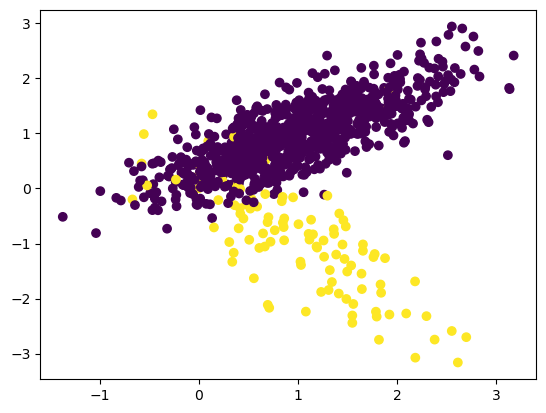

In [36]:
import matplotlib.pyplot as plt
plt.scatter(final_df["f1"], final_df["f2"], c=final_df["target"])


In [37]:
from imblearn.over_sampling import SMOTE

In [38]:
oversample = SMOTE()

In [39]:
x,y = oversample.fit_resample(final_df[["f1","f2"]],final_df["target"])

In [40]:
x.shape

(1788, 2)

In [41]:
y.shape

(1788,)

In [42]:
len(y[y==0])

894

In [43]:
len(y[y==1])

894

In [47]:
df1= pd.DataFrame(x,columns=["f1","f2"])
df2= pd.DataFrame(y,columns=["target"])
oversample_df=pd.concat([df1,df2],axis=1)
oversample_df

,f1,f2,target
0,1.536830,-1.398694,1
1,1.551108,1.810329,0
2,1.293619,1.010946,0
3,1.119889,1.632518,0
4,1.042356,1.121529,0
...,...,...,...
1783,0.379066,0.905933,1
1784,1.756310,-2.345462,1
1785,2.334889,-2.820627,1
1786,1.104103,-0.147551,1


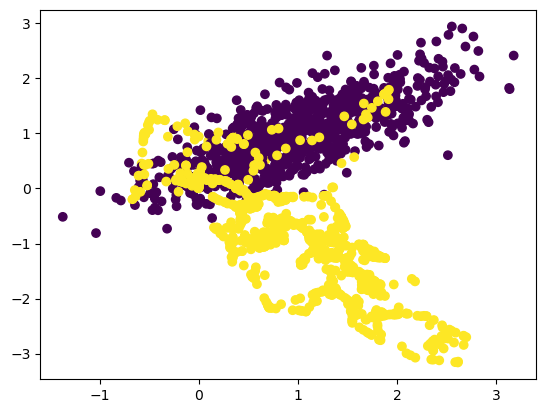

In [50]:
plt.scatter(oversample_df["f1"], oversample_df["f2"], c=oversample_df["target"])


### Nominal/OHE Encoding
One hot encoding, also kown as nominal encoding, is a technique used to represent categorial data as numerical data, which is more suitable for machine  learning
algorithms. 

In [51]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

In [54]:
df= pd.DataFrame({
    "color":["red","blue","green","green","red","blue"]
})

In [55]:
df.head()

,color
0,red
1,blue
2,green
3,green
4,red


In [56]:
en= OneHotEncoder()

In [57]:
enc= en.fit_transform(df[["color"]]).toarray()

In [58]:
enc_df=pd.DataFrame(enc,columns=encode)

NameError: name 'encode' is not defined

## Label Encoding
Label encoding and ordinal encoding are two teachniques using to encode categorical data as numerical; data.
Label encoding involve assigning a unique numerical label to each category in the variable. The labels are usually assigning in alphabetical order or based on the frequency of the categories.For example, if we have a category variable"color" with three possible values(red, green,blue)we can represent it using label encoding as follows:
1. Red:1
2. Green:2
3. Blue:3


In [60]:
from sklearn.preprocessing import LabelEncoder
lbl=LabelEncoder()

In [61]:
lbl.fit_transform(df[["color"]])

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([2, 0, 1, 1, 2, 0])

In [62]:
lbl.transform([["red"]])

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


array([2])

## Ordinal Encoding
It is used to encode catagorical data that have an intrinic order or ranking. In this technique, each categories is assigned a numerical value based on its position in the order. for example, if we have a categories variable "education level" with four possible values()

In [63]:
from sklearn.preprocessing import  OrdinalEncoder

In [64]:
df=pd.DataFrame({
    "size":["small","medium","large","XL","XXL","XXXL"]
})

In [65]:
df

,size
0,small
1,medium
2,large
3,XL
4,XXL
5,XXXL


In [66]:
encoder = OrdinalEncoder(categories=[["samll","medium","large"]])

In [67]:
encoder.fit_transform(df[["size"]])

ValueError: Found unknown categories ['XXXL', 'small', 'XXL', 'XL'] in column 0 during fit